In [1]:
import csv
import requests
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

In [2]:
#target_years = [2012, 2013, 2014, 2015, 2016, 2017]
target_years = [2017]
#target_state=["NJ","RI","MA","CT", "MD", "DE", "NY", "FL", "PA", "OH"]
target_state=["FL"]

In [3]:
#Set up empty list to hold API data
counties = []
year = []
states = []
count = []
mydict = dict()

In [4]:
#put vaccine data from api into a dataframe
for x in target_years:
    for y in target_state:
        data = requests.get(f'https://fluvaccineapi.hhs.gov/api/v2/vaccination_rates/{x}/states/{y}/counties.json?ethnicity=T&medicare_status=A').json()
        for i in data:
            year.append(i["year"])
            count.append(i["count"])
            states.append(i["state"])
            counties.append(i["name"])
mydict = {"Year":year,"State":states,"County":counties,"Vaccine Count":count}
vaccine_data_df = pd.DataFrame(mydict)
vaccine_data_df.head()


,Year,State,County,Vaccine Count
0,2017,FL,ALACHUA,27993
1,2017,FL,BAKER,2917
2,2017,FL,BAY,25116
3,2017,FL,BRADFORD,3236
4,2017,FL,BREVARD,78896


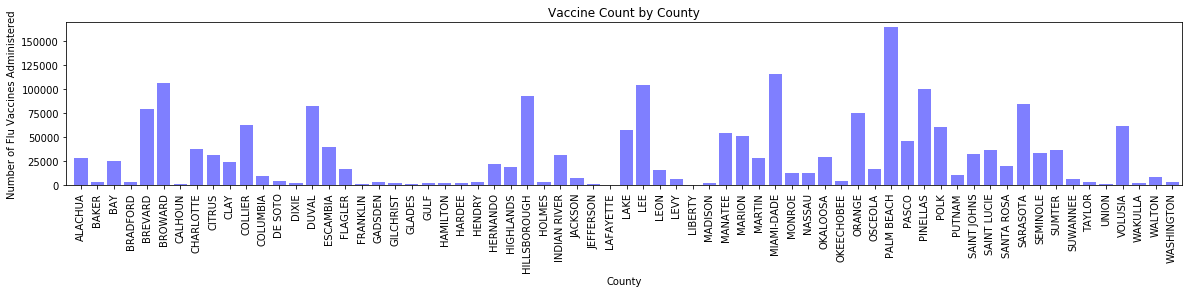

In [5]:
plt.figure(figsize=(20,3))
y_axis= vaccine_data_df["Vaccine Count"]
x_axis = np.arange(len(vaccine_data_df["County"]))
tick_locations = [value+0.4 for value in x_axis]
plt.bar(x_axis, y_axis, color="blue", align="edge", alpha=.5)

plt.xticks(tick_locations, vaccine_data_df["County"], rotation="vertical")

#Set x and y limits
plt.xlim(-0.5, len(x_axis))
plt.ylim(0, max(vaccine_data_df["Vaccine Count"]) +5000)

# Set a Title and labels
plt.title("Vaccine Count by County")
plt.xlabel("County")
plt.ylabel("Number of Flu Vaccines Administered")

plt.savefig("Images/FL_vaccines_country_17.png")
plt.show()

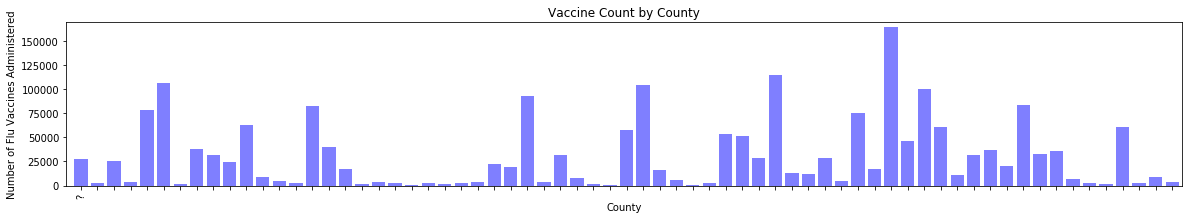

In [6]:
plt.figure(figsize=(20,3))
y_axis= vaccine_data_df["Vaccine Count"]
x_axis = np.arange(len(vaccine_data_df["County"]))
tick_locations = [value+0.4 for value in x_axis]
plt.bar(x_axis, y_axis, color="blue", align="edge", alpha=.5)

plt.xticks(tick_locations, "?", rotation="vertical")

#Set x and y limits
plt.xlim(-0.5, len(x_axis))
plt.ylim(0, max(vaccine_data_df["Vaccine Count"]) +5000)

# Set a Title and labels
plt.title("Vaccine Count by County")
plt.xlabel("County")
plt.ylabel("Number of Flu Vaccines Administered")

plt.savefig("Images/FL_vaccines_country_17v2.png")
plt.show()